In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

data = pd.read_csv("hotelreviews_sentiments.csv")

In [10]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

In [11]:
# Recreate hotel_sentiments by grouping data
hotel_sentiments = data.groupby('Hotel_Name')[['Positive_Sentiment', 'Negative_Sentiment']].mean()
hotel_sentiments['Hotel_Score'] = (hotel_sentiments['Positive_Sentiment'] - abs(hotel_sentiments['Negative_Sentiment'])) * 50 + 50
top_hotels = hotel_sentiments.sort_values(by='Hotel_Score', ascending=False).head(5).index


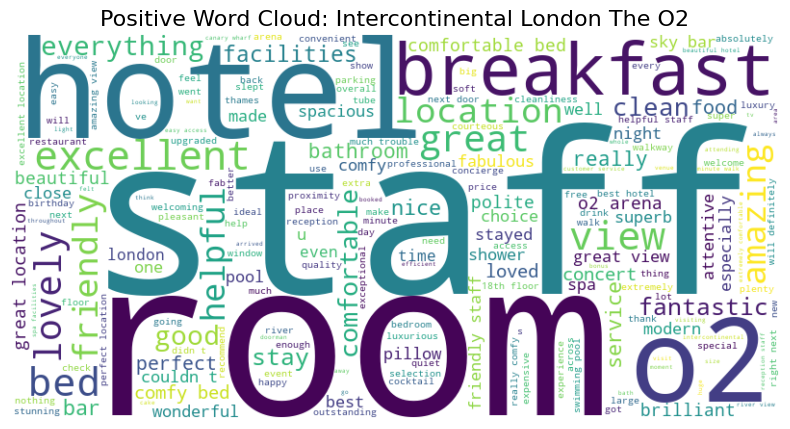

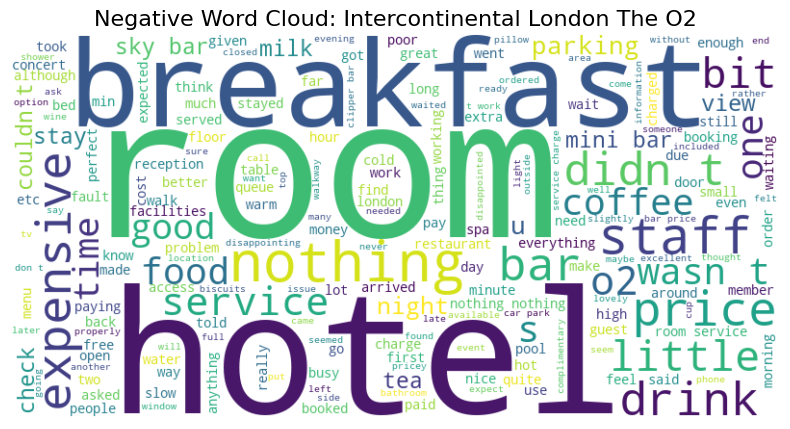

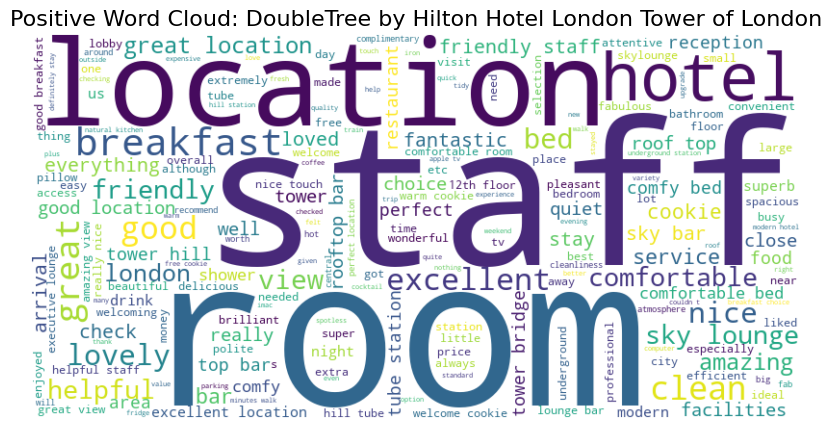

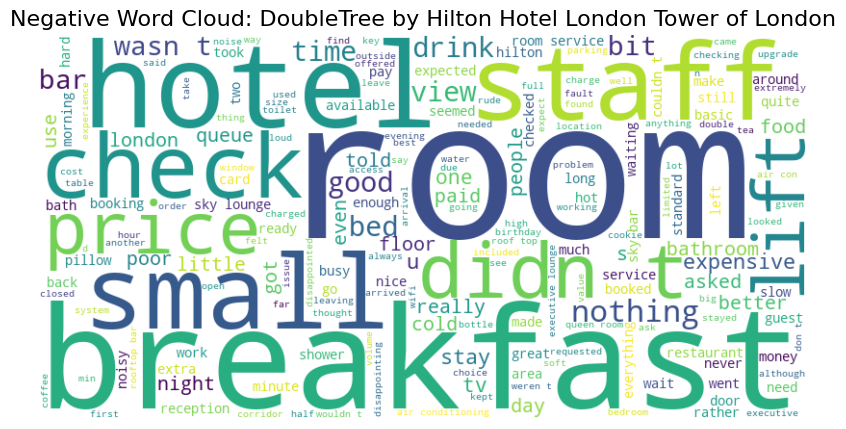

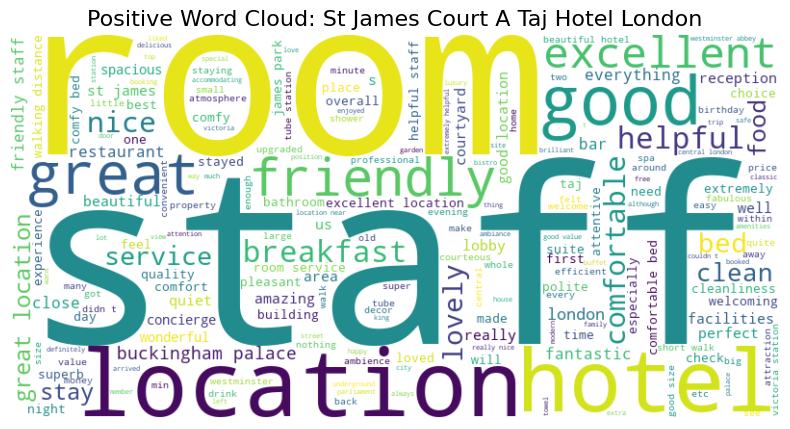

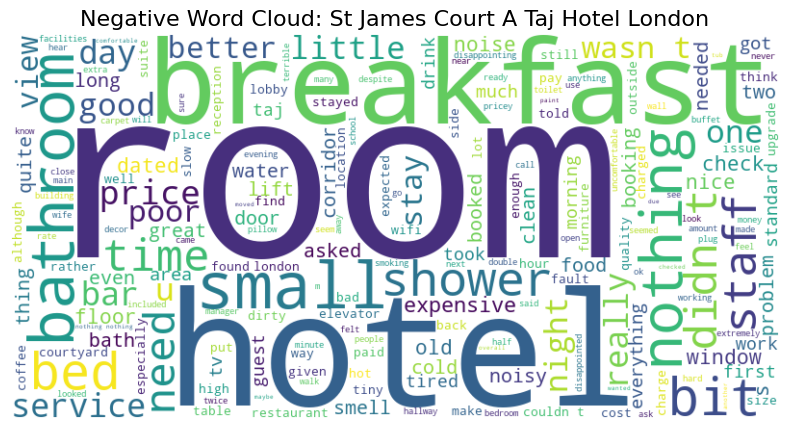

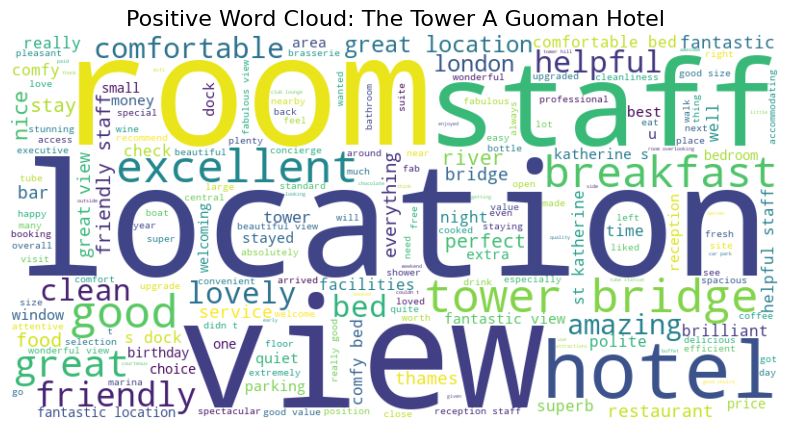

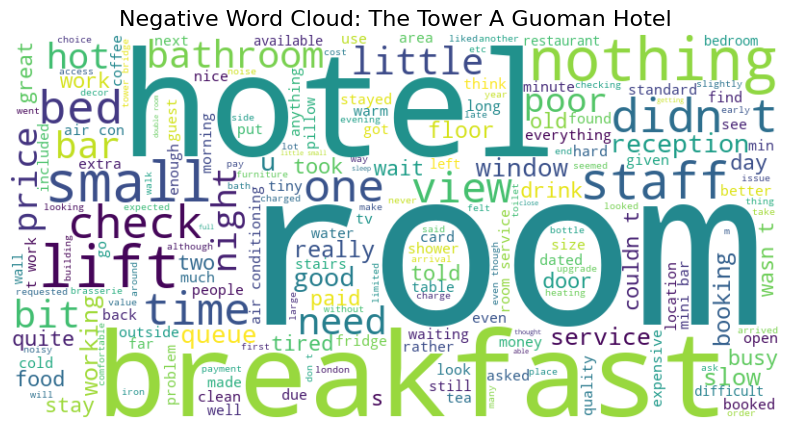

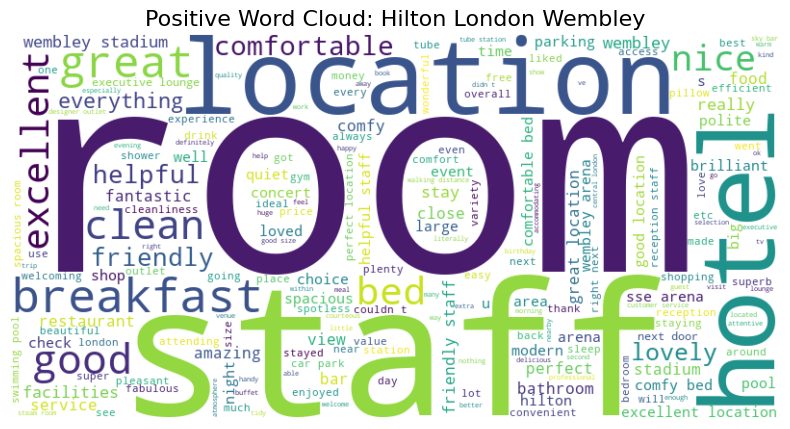

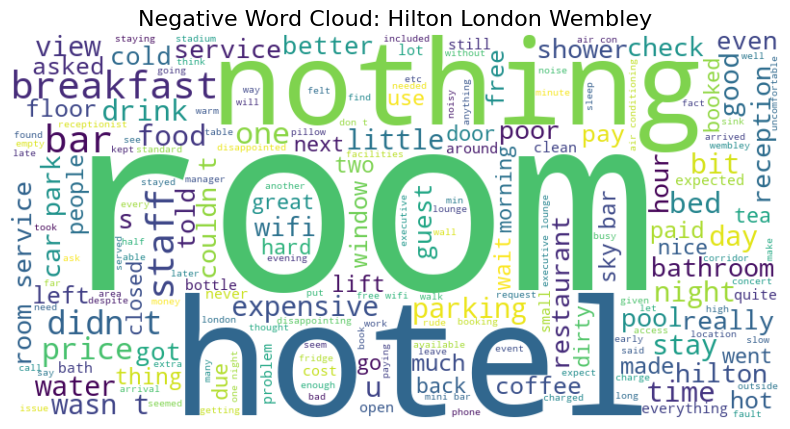

In [12]:
for hotel_name in top_hotels:
    hotel_data = data[data['Hotel_Name'] == hotel_name]
    positive_text = " ".join(hotel_data['Positive_Review'])
    negative_text = " ".join(hotel_data['Negative_Review'])
    generate_word_cloud(positive_text, f"Positive Word Cloud: {hotel_name}")
    generate_word_cloud(negative_text, f"Negative Word Cloud: {hotel_name}")